# 1. Hiyerarşik Kümeleme

In [18]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [19]:
arrests = pd.read_csv("USArrests.csv")

df = arrests.copy()

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [21]:
df.index = df.iloc[:, 0]

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [22]:
df = df.iloc[:, 1:5]

df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [23]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [24]:
df.info

<bound method DataFrame.info of                 Murder  Assault  UrbanPop  Rape
Unnamed: 0                                     
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine   

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [26]:
df.index.name = "States"

df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [27]:
hc_complete = linkage(df, "complete")

hc_average = linkage(df, "average")

hc_single = linkage(df, "single")

In [28]:
dir(hc_complete)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [115.0, 115.0, 140.0, 140.0],
  [92.5, 92.5, 127.5, 127.5],
  [47.5, 47.5, 110.0, 110.0],
  [10.0, 10.0, 78.75, 78.75],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [243.75, 243.75, 282.5, 282.5],
  [225.0, 225.0, 263.125, 263.125],
  [187.5, 187.5, 244.0625, 244.0625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [355.0, 355.0, 365.0

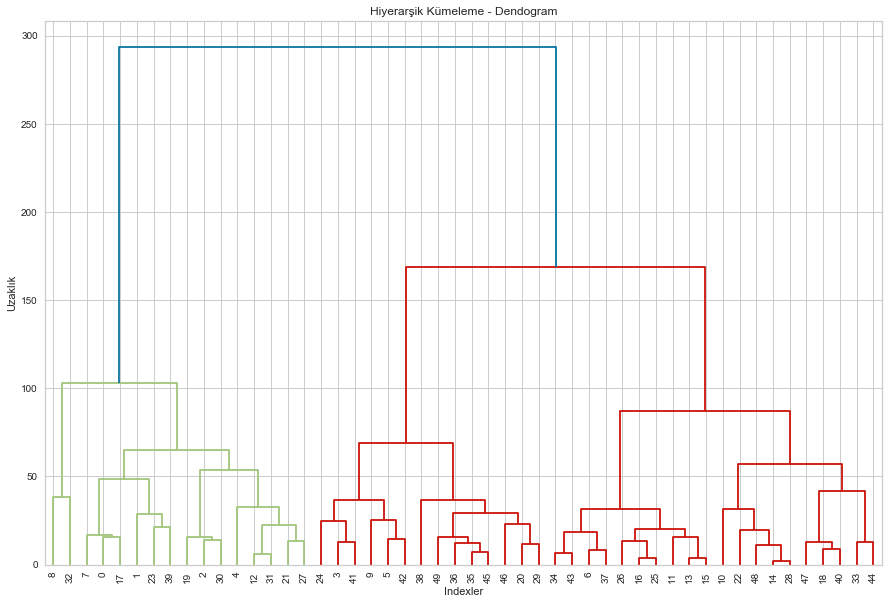

In [29]:
plt.figure(figsize=(15, 10))

plt.title('Hiyerarşik Kümeleme - Dendogram')

plt.xlabel('Indexler')

plt.ylabel('Uzaklık')

dendrogram(hc_complete, leaf_font_size=10)

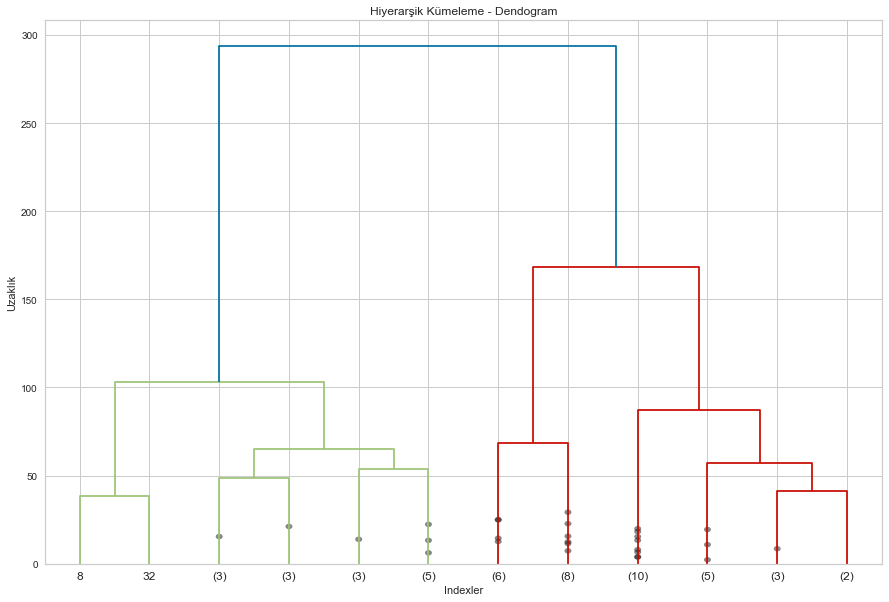

In [30]:
plt.figure(figsize=(15, 10))

plt.title('Hiyerarşik Kümeleme - Dendogram')

plt.xlabel('Indexler')

plt.ylabel('Uzaklık')

dendrogram(hc_complete, truncate_mode = "lastp", p = 12, show_contracted = True);

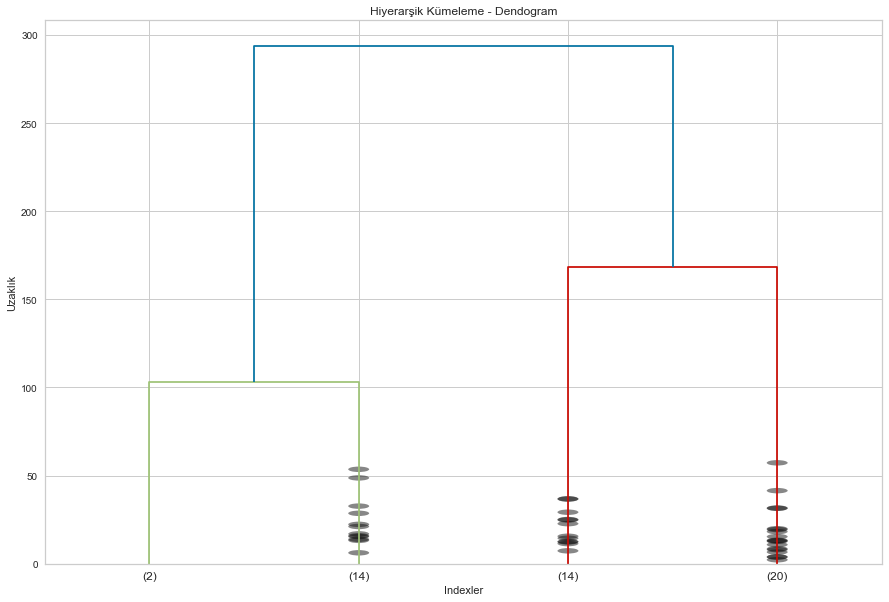

In [31]:
plt.figure(figsize=(15, 10))

plt.title('Hiyerarşik Kümeleme - Dendogram')

plt.xlabel('Indexler')

plt.ylabel('Uzaklık')

dendrogram(hc_complete, truncate_mode = "lastp", p = 4, show_contracted = True);

----------

# 2. Optimum Küme Sayısı

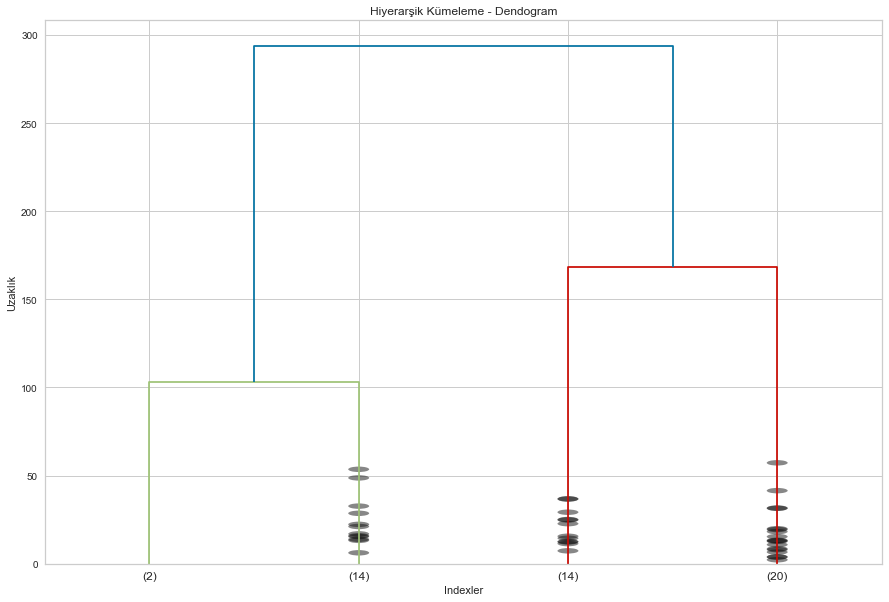

In [33]:
plt.figure(figsize=(15, 10))

plt.title('Hiyerarşik Kümeleme - Dendogram')

plt.xlabel('Indexler')

plt.ylabel('Uzaklık')

den = dendrogram(hc_complete, truncate_mode = "lastp", p = 4, show_contracted = True);

In [34]:
?den

Type:        dict
String form: {'icoord': [[5.0, 5.0, 15.0, 15.0], [25.0, 25.0, 35.0, 35.0], [10.0, 10.0, 30.0, 30.0]], 'dcoord' <...> ivl': ['(2)', '(14)', '(14)', '(20)'], 'leaves': [88, 93, 94, 95], 'color_list': ['g', 'r', 'b']}
Length:      5
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


In [35]:
?dendrogram

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='b',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children.  The top of the U-link indicates a
cluster merge.  The two legs of the U-link indicate which clusters
were merged.  The length of the two legs of the U-link represents
the distance between the child clusters.  It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix enc

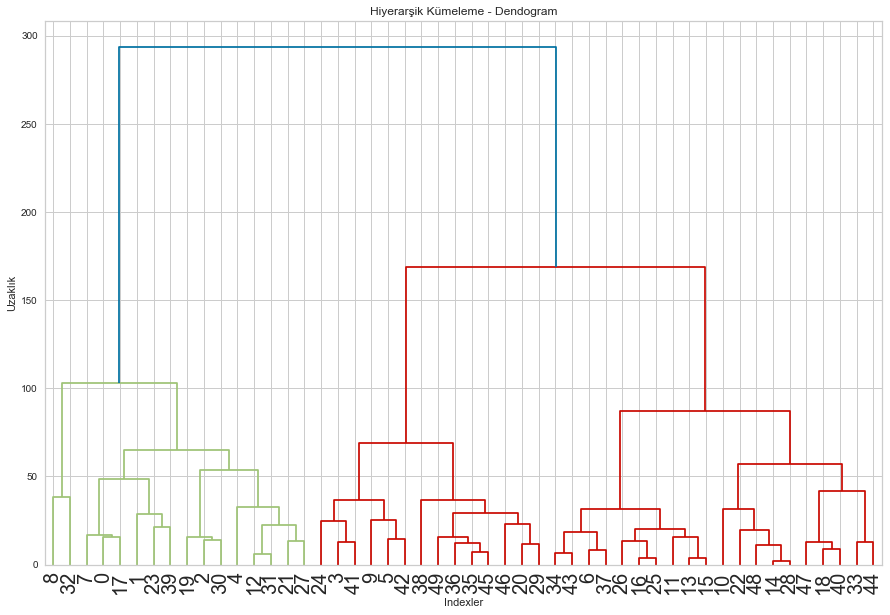

In [36]:
plt.figure(figsize=(15, 10))

plt.title('Hiyerarşik Kümeleme - Dendogram')

plt.xlabel('Indexler')

plt.ylabel('Uzaklık')

den = dendrogram(hc_complete, leaf_font_size = 20);

In [37]:
cluster = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [38]:
pd.DataFrame({"States" : df.index, "Clusters" : cluster.fit_predict(df)})

,States,Clusters
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2
